## Testing CCNOT (Toffoli) gate using IBMQ

#### Load libraries

In [1]:
!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer

#### Qconfig_IBMQ_experience.py is file where you put the credentials in the form: 
#### APItoken = '' 
#### To get the token register at https://quantum-computing.ibm.com/account 

In [2]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

####   Alternatively you can insert token directly:             

In [4]:
#IBMQ.enable_account("your token here")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### See which backends are available

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

#### Choose the backend you like

In [6]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
#backend  = my_provider.get_backend('ibmq_qasm_simulator')

### Let's now write the code for quantum circuit: Toffoli (CCNOT) gate 
#### The CCNOT gate consists of two controlling Qbits and one target Qbit  https://en.wikipedia.org/wiki/Quantum_logic_gate
#### This circuit consists of two repeating blocks which we call A and B gates        

#### Create 3 Qbits and 3 classical measurement gates

In [3]:
qr=qk.QuantumRegister(3)
cr=qk.ClassicalRegister(3)
qc=qk.QuantumCircuit(qr,cr)

### Prepare the state of controlling Qbits
####  Let's choose Qbits 1 and 2 as controlling ones and Qbit 0 as the target one. 
#### Initially all Qbits are in |0> state


In [4]:
#qc.x(qr[2])
qc.x(qr[1])

#### Write the A and B gates which are the elements of the Toffoli gate


In [5]:
# A gate
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

# A gate
qc.h(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

#### Create measurement gates in computational basis


In [6]:
measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)

#### Create measurement gates in superposition basis


In [7]:
measureX=qk.QuantumCircuit(qr,cr)
measureX.h(qr)
measureX.measure(qr,cr)

#### Add measurement gates to the cirquit

In [8]:
testZ=qc+measureZ
testX=qc+measureX

#### See the structure of this circuit :

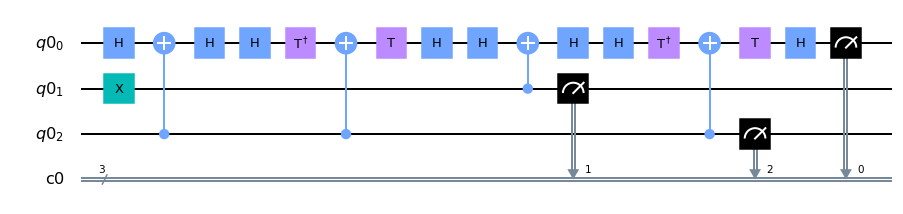

In [9]:
testZ.draw(output='mpl')

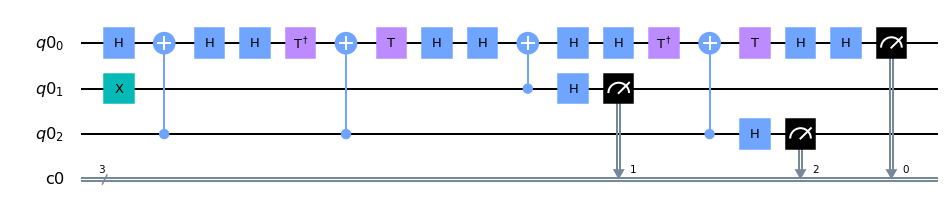

In [10]:
testX.draw(output='mpl')

### Run the algorithm

#### 1) Choose backend: IBM cloud simulator

In [18]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmq_qasm_simulator')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()


Plot results as histogram

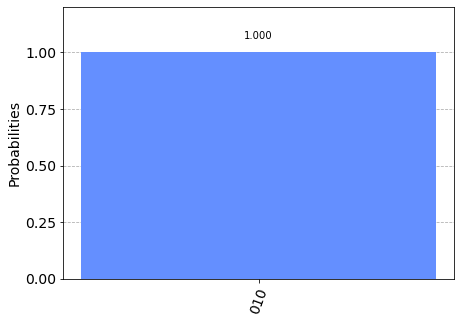

In [19]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 


<span style="color:blue"> **As the initial state is 010 it should not change by CCNOT. </br>
    As we see simulator gives the correct result** </span>

#### 2) Choose backend: Local qiskit simulator

In [16]:
backend=Aer.get_backend('qasm_simulator')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()

Plot results as histogram

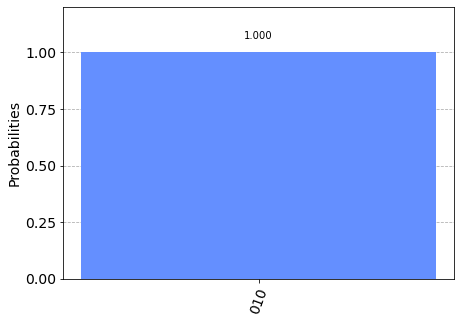

In [17]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 


#### 3) Find less buisy device

In [22]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>

#### 3a) Choose backend: least buisy

In [23]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmq_ourense')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()

Plot results as histogram

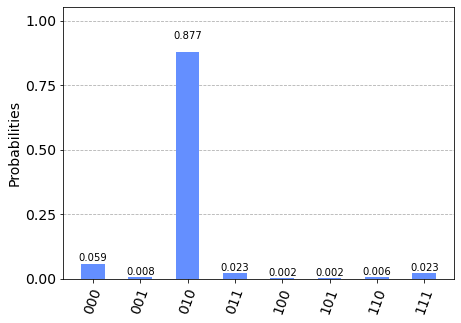

In [24]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 

#### As the initial state is 010 it should not change by CCNOT. 
####    As we see real experiment gives this result with probability 0.854

### Let's try another input state, e.g. 011

In [30]:
qr=qk.QuantumRegister(3)
cr=qk.ClassicalRegister(3)
qc=qk.QuantumCircuit(qr,cr)

qc.x(qr[2])
qc.x(qr[1])

# A gate
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

# A gate
qc.h(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ


#### Choose backend: Local qiskit simulator 

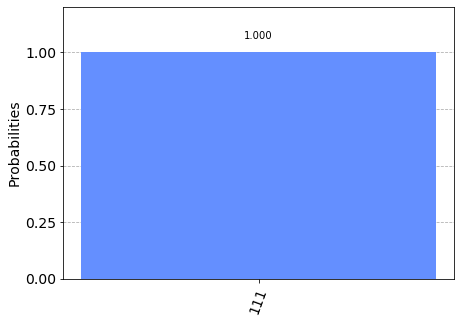

In [32]:
backend=Aer.get_backend('qasm_simulator')

jobIBM=qk.execute([testZ],backend=backend,shots=1024)
result=jobIBM.result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 

#### Choose backend: ibmqx2 chip

In [33]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')

jobIBM=qk.execute([testZ],backend=backend,shots=1024)
result=jobIBM.result()

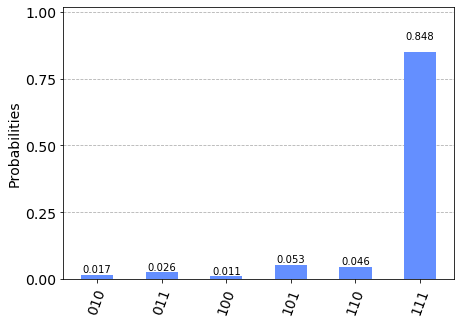

In [34]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 

In [26]:
from qiskit import IBMQ
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-04 11:17:00,808: Credentials are already in use. The existing account in the session will be replaced.


In [27]:
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"

In [28]:
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns") 

Sampling time: 0.2222222222222222 ns


In [29]:
backend_defaults = backend.defaults()